In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [4]:
import colorcet as cc

In [5]:
df = pd.read_pickle("../output/data/tracers_notrajs/prob_matrix_tracers_notrajs_symmetrized_10000.p")

In [6]:
_order = [
    'brain',
    'heart',
    'left_adrenal_gland',
    'left_kidney',
    'left_lung',
    'right_adrenal_gland',
    'right_kidney',    
    'right_lung',
    'liver',
    'pancreas',
    'prostate',
    'small_intestine',
    'large_intestine',
    'stomach',
    'urinary_bladder',
    'gallbladder',
]
_order = sorted(df.columns)

In [7]:
df = df.loc[_order, _order]

In [8]:
df = df.drop("heart", axis=0)

In [9]:
df.columns = [x.replace("_", " ") for x in df.columns]
df.columns.name = "Metastatic site"
df.index = [x.replace("_", " ") for x in df.index]
df.index.name = "Primary Organ"

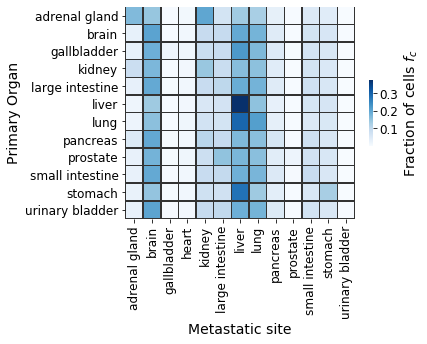

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5), tight_layout=True)
ax.set_aspect(1)
im = sns.heatmap(
    df,
    ax=ax,
    cmap="Blues",
#    vmin=0, vmax=0.5,
    linewidths=0.5,
    linecolor="0.2",
    cbar_kws={"shrink": 0.3, "label": "Fraction of cells $f_c$"}
)
fig.savefig("../figures/model-fraction-cells-heatmap/model_fractions_heatmap.png", dpi=300)